In [37]:
# IMPLEMENTATION OF LINEAR REGRESSION

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
from kagglehub import KaggleDatasetAdapter, dataset_load

In [ ]:
# CUSTOM LINEAR REGRESSION
class LinearRegression:
    def __init__(self, alpha= 0.01):
        self.intercept_ = 0
        self.coef_      = 0
        self.alpha_     = alpha

    def fit(self, X_train, y_train):
        if len(X_train) != len(y_train):
            raise ValueError('X_train and y_train should have same length')

        b = 0
        w = 0
        for _ in range(1000000):
            dj_dw, dj_db = self.__get_derivatives(X_train, y_train, w, b)
            w = w - self.alpha_ * dj_dw
            b = b - self.alpha_ * dj_db

        self.intercept_ = b
        self.coef_      = w

    def predict(self, X):
        result = []

        for x in X:
            result.append(self.coef_ * x + self.intercept_)

        return result

    def __get_derivatives(self, X_train, y_train, w, b):
        dj_dw = 0
        dj_db = 0

        multiplier = 2 / len(X_train)

        for x, y in zip(X_train, y_train):
            tmp = (w * x + b) - y
            dj_dw += x * tmp
            dj_db += tmp

        dj_dw *= multiplier
        dj_db *= multiplier

        return dj_dw, dj_db

In [ ]:
# UTILITY FUNCTIONS
def load_data():
    file_path = 'Salary_Data.csv'

    data_frame = dataset_load(
        KaggleDatasetAdapter.PANDAS,
        'rohankayan/years-of-experience-and-salary-dataset',
        file_path,
    )

    data_frame.columns = ['experience', 'salary']

    return data_frame


def visualize_data(data: pd.DataFrame):
    plt.scatter(data=data, x='experience', y='salary')
    plt.xlabel('Experience')
    plt.ylabel('Salary')
    plt.title('Experience vs Salary')
    plt.show()
    pass

In [17]:
data_frame = load_data()

data_frame

,experience,salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


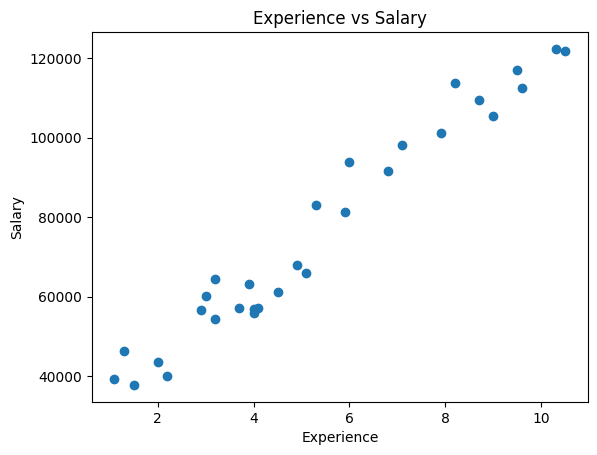

In [25]:
visualize_data(data_frame)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(data_frame['experience'], data_frame['salary'], random_state=0)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

print('The equation is: salary = {:.2f} * experience + {:.2f}'.format(model.coef_, model.intercept_))

The equation is: salary = 9450.80 * experience + 26550.41


The plot of regression line:


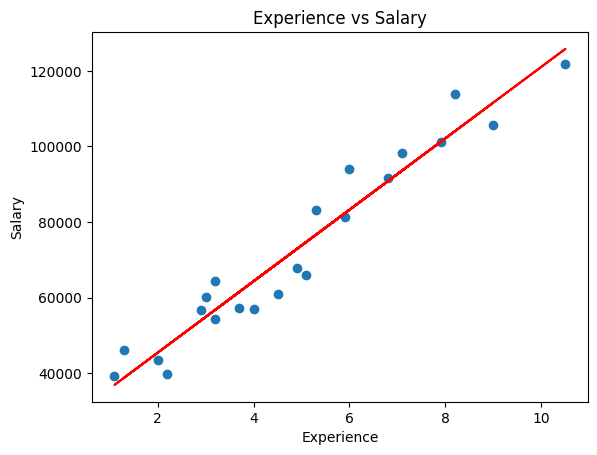

In [71]:
print('The plot of regression line:')

y_pred = model.predict(X_train)

plt.scatter(X_train, y_train)

plt.plot(X_train, y_pred, color='red')

plt.xlabel('Experience')
plt.ylabel('Salary')
plt.title('Experience vs Salary')

plt.show()

In [79]:
df = pd.DataFrame({
    'Observed': y_train,
    'Predicted': [round(y, 2) for y in y_pred]
})

df

,Observed,Predicted
17,83088.0,76639.63
22,101302.0,101211.71
5,56642.0,53957.72
16,66029.0,74749.47
8,64445.0,56792.96
14,61111.0,69079.00
23,113812.0,104046.95
20,91738.0,90815.83
1,46205.0,38836.44
29,121872.0,125783.78
